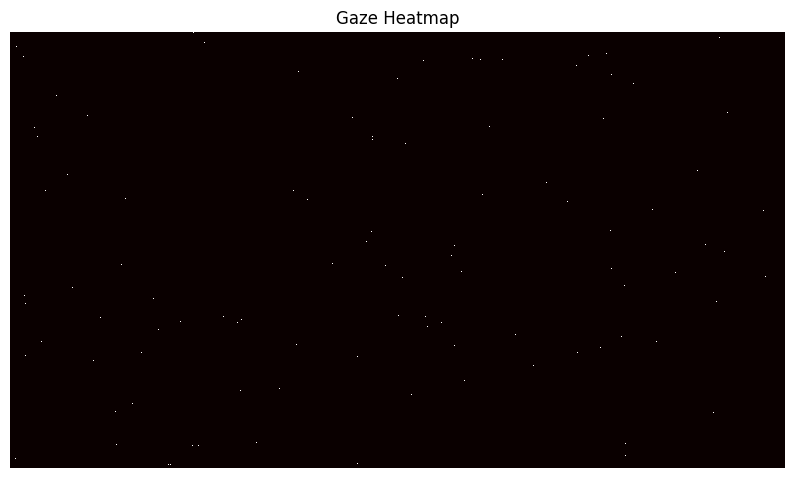

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt

def create_heatmap_from_gaze_data(json_data):
    # Define screen dimensions (example dimensions, adjust as necessary)
    screen_width = 1920
    screen_height = 1080
    
    # Initialize a matrix to accumulate gaze points
    heatmap_data = np.zeros((screen_height, screen_width))
    
    # Process each gaze event
    for event in json_data:
        if event['type'] == 'gaze_data' and 'adjusted_gaze_start_position' in event['data']:
            adjusted_start_pos = event['data']['adjusted_gaze_start_position']
            
            # Skip events with null positions
            if None in adjusted_start_pos:
                continue
            
            # Extract position
            pos_x = int(adjusted_start_pos[0])
            pos_y = int(adjusted_start_pos[1])
            
            # Ensure the position is within the screen bounds
            if 0 <= pos_x < screen_width and 0 <= pos_y < screen_height:
                heatmap_data[pos_y, pos_x] += 1  # Increment density
    
    # Plot the heatmap
    plt.figure(figsize=(10, 6))
    plt.imshow(heatmap_data, cmap='hot', interpolation='nearest')
    plt.title('Gaze Heatmap')
    plt.axis('off')  # Hide axes for better visualization
    plt.show()

# Example usage with your loaded JSON data
json_data = json.load(open('../model/synthetic_data/session_1/activity_log.json'))
create_heatmap_from_gaze_data(json_data)
